In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS, summarize, poly, sklearn_sm, Stepwise, sklearn_selected, sklearn_selection_path)
from functools import partial
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [17]:
from sklearn.svm import SVC, SVR
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
roc_curve = RocCurveDisplay.from_estimator

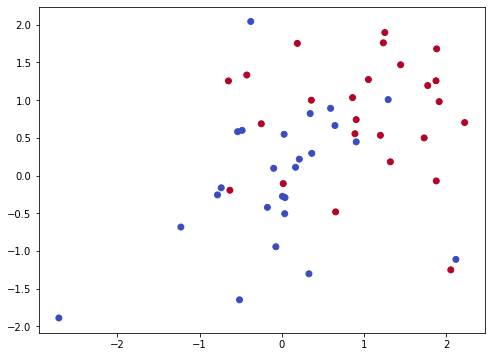

In [5]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25 + [1]*25)
X[y==1] += 1
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

In [6]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

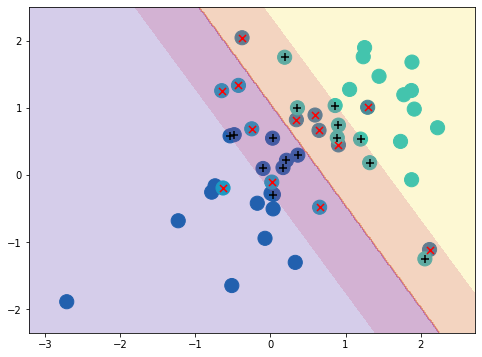

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X, y, svm_linear, ax=ax)

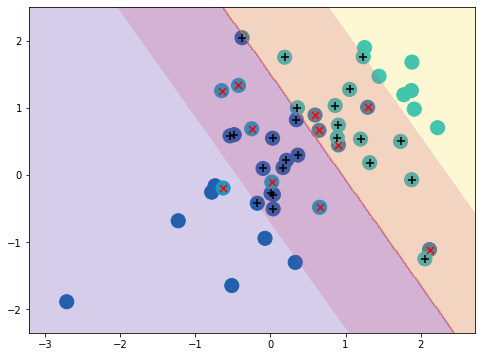

In [8]:
svm_linear = SVC(C=0.1, kernel='linear')
svm_linear.fit(X, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X, y, svm_linear, ax=ax)

In [11]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test==1] += 1

In [12]:
svm_linear = SVC(C=1, kernel='linear')
svm_linear.fit(X, y)

SVC(C=1, kernel='linear')

In [13]:
y_hat = svm_linear.predict(X_test)
confusion_table(y_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,3
1,2,7


In [14]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150 + [2]*50)

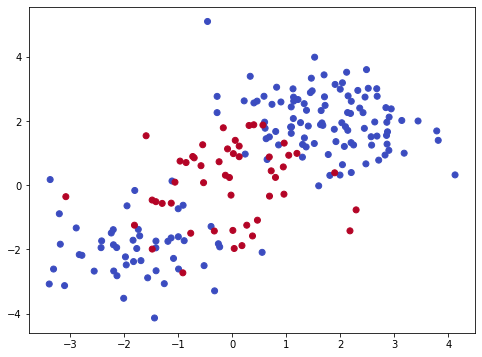

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [19]:
svm_rbf = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

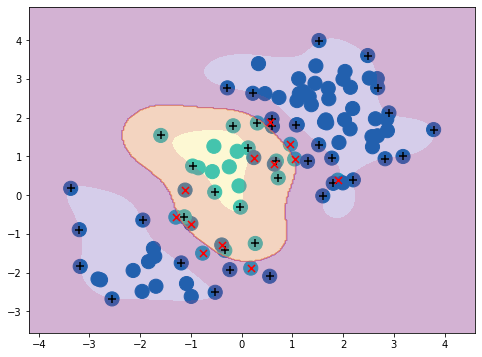

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

In [23]:
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.1, 0.5, 1, 2, 4]}
grid = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_estimator_, grid.best_params_

(SVC(C=1, gamma=0.1), {'C': 1, 'gamma': 0.1})

In [24]:
grid.best_score_

0.8700000000000001